<a href="https://www.kaggle.com/code/amansingh0000000/breadth-liyzer-result-analyzer?scriptVersionId=230190552" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-traffic-violation/Indian_Traffic_Violations.csv


In [2]:
df = pd.read_csv('/kaggle/input/indian-traffic-violation/Indian_Traffic_Violations.csv')

In [3]:
df.head()

,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,...,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments
0,VLT100000,Overloading,4544,Karnataka,2023-01-01,23:02,Car,Red,2012,West Bengal,...,100,95,0.03,Negative,Yes,No,Online,Yes,3,Repeat Offender
1,VLT100001,Driving Without License,2776,Punjab,2023-01-02,00:42,Scooter,Silver,2010,Tamil Nadu,...,40,48,0.45,Negative,Yes,Yes,Online,No,2,Repeat Offender
2,VLT100002,Using Mobile Phone,4785,Maharashtra,2023-01-03,04:32,Scooter,Grey,2006,Tamil Nadu,...,80,26,0.31,Not Conducted,No,No,Not Paid,Yes,4,NaN
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,2023-01-04,15:06,Car,Green,1996,Uttar Pradesh,...,100,115,0.09,Not Conducted,No,Yes,Online,No,5,Repeat Offender
4,VLT100004,Over-speeding,1610,Karnataka,2023-01-05,06:57,Truck,Yellow,2016,Delhi,...,30,115,0.28,Positive,No,Yes,Cash,Yes,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Violation_ID               4000 non-null   object 
 1   Violation_Type             4000 non-null   object 
 2   Fine_Amount                4000 non-null   int64  
 3   Location                   4000 non-null   object 
 4   Date                       4000 non-null   object 
 5   Time                       4000 non-null   object 
 6   Vehicle_Type               4000 non-null   object 
 7   Vehicle_Color              4000 non-null   object 
 8   Vehicle_Model_Year         4000 non-null   int64  
 9   Registration_State         4000 non-null   object 
 10  Driver_Age                 4000 non-null   int64  
 11  Driver_Gender              4000 non-null   object 
 12  License_Type               4000 non-null   object 
 13  Penalty_Points             4000 non-null   int64

In [5]:
df.describe()

,Fine_Amount,Vehicle_Model_Year,Driver_Age,Penalty_Points,Number_of_Passengers,Speed_Limit,Recorded_Speed,Alcohol_Level,Previous_Violations
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2529.821250,2008.910500,46.658000,4.960500,3.00050,59.817500,69.479000,0.251408,2.47750
std,1417.415712,8.333208,16.865858,3.157441,1.41085,23.633267,29.394652,0.143744,1.71398
min,100.000000,1995.000000,18.000000,0.000000,1.00000,30.000000,20.000000,0.000000,0.00000
25%,1280.750000,2002.000000,32.000000,2.000000,2.00000,40.000000,43.000000,0.130000,1.00000
50%,2506.000000,2009.000000,47.000000,5.000000,3.00000,60.000000,70.000000,0.250000,2.00000
75%,3733.000000,2016.000000,61.000000,8.000000,4.00000,80.000000,95.000000,0.380000,4.00000
max,5000.000000,2023.000000,75.000000,10.000000,5.00000,100.000000,120.000000,0.500000,5.00000


In [6]:
df.columns.values

array(['Violation_ID', 'Violation_Type', 'Fine_Amount', 'Location',
       'Date', 'Time', 'Vehicle_Type', 'Vehicle_Color',
       'Vehicle_Model_Year', 'Registration_State', 'Driver_Age',
       'Driver_Gender', 'License_Type', 'Penalty_Points',
       'Weather_Condition', 'Road_Condition', 'Officer_ID',
       'Issuing_Agency', 'License_Validity', 'Number_of_Passengers',
       'Helmet_Worn', 'Seatbelt_Worn', 'Traffic_Light_Status',
       'Speed_Limit', 'Recorded_Speed', 'Alcohol_Level',
       'Breathalyzer_Result', 'Towed', 'Fine_Paid', 'Payment_Method',
       'Court_Appearance_Required', 'Previous_Violations', 'Comments'],
      dtype=object)

In [7]:
cols = ['Violation_ID','Date', 'Time', 'Vehicle_Type', 'Vehicle_Color','Registration_State','License_Type',
        'Issuing_Agency','Helmet_Worn', 'Seatbelt_Worn', 'Traffic_Light_Status','Previous_Violations', 'Comments']

df = df.drop(columns = cols)

In [8]:
df.head()

,Violation_Type,Fine_Amount,Location,Vehicle_Model_Year,Driver_Age,Driver_Gender,Penalty_Points,Weather_Condition,Road_Condition,Officer_ID,License_Validity,Number_of_Passengers,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required
0,Overloading,4544,Karnataka,2012,25,Male,5,Cloudy,Slippery,OFF9971,Valid,4,100,95,0.03,Negative,Yes,No,Online,Yes
1,Driving Without License,2776,Punjab,2010,32,Female,4,Rainy,Dry,OFF6000,Valid,4,40,48,0.45,Negative,Yes,Yes,Online,No
2,Using Mobile Phone,4785,Maharashtra,2006,67,Female,8,Clear,Potholes,OFF5706,Valid,5,80,26,0.31,Not Conducted,No,No,Not Paid,Yes
3,No Seatbelt,1138,Uttar Pradesh,1996,46,Male,3,Rainy,Wet,OFF5575,Valid,2,100,115,0.09,Not Conducted,No,Yes,Online,No
4,Over-speeding,1610,Karnataka,2016,63,Female,4,Foggy,Potholes,OFF7147,Valid,4,30,115,0.28,Positive,No,Yes,Cash,Yes


In [9]:
df.describe()

,Fine_Amount,Vehicle_Model_Year,Driver_Age,Penalty_Points,Number_of_Passengers,Speed_Limit,Recorded_Speed,Alcohol_Level
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,2529.821250,2008.910500,46.658000,4.960500,3.00050,59.817500,69.479000,0.251408
std,1417.415712,8.333208,16.865858,3.157441,1.41085,23.633267,29.394652,0.143744
min,100.000000,1995.000000,18.000000,0.000000,1.00000,30.000000,20.000000,0.000000
25%,1280.750000,2002.000000,32.000000,2.000000,2.00000,40.000000,43.000000,0.130000
50%,2506.000000,2009.000000,47.000000,5.000000,3.00000,60.000000,70.000000,0.250000
75%,3733.000000,2016.000000,61.000000,8.000000,4.00000,80.000000,95.000000,0.380000
max,5000.000000,2023.000000,75.000000,10.000000,5.00000,100.000000,120.000000,0.500000


In [10]:
df.columns.values

array(['Violation_Type', 'Fine_Amount', 'Location', 'Vehicle_Model_Year',
       'Driver_Age', 'Driver_Gender', 'Penalty_Points',
       'Weather_Condition', 'Road_Condition', 'Officer_ID',
       'License_Validity', 'Number_of_Passengers', 'Speed_Limit',
       'Recorded_Speed', 'Alcohol_Level', 'Breathalyzer_Result', 'Towed',
       'Fine_Paid', 'Payment_Method', 'Court_Appearance_Required'],
      dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Violation_Type             4000 non-null   object 
 1   Fine_Amount                4000 non-null   int64  
 2   Location                   4000 non-null   object 
 3   Vehicle_Model_Year         4000 non-null   int64  
 4   Driver_Age                 4000 non-null   int64  
 5   Driver_Gender              4000 non-null   object 
 6   Penalty_Points             4000 non-null   int64  
 7   Weather_Condition          4000 non-null   object 
 8   Road_Condition             4000 non-null   object 
 9   Officer_ID                 4000 non-null   object 
 10  License_Validity           4000 non-null   object 
 11  Number_of_Passengers       4000 non-null   int64  
 12  Speed_Limit                4000 non-null   int64  
 13  Recorded_Speed             4000 non-null   int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

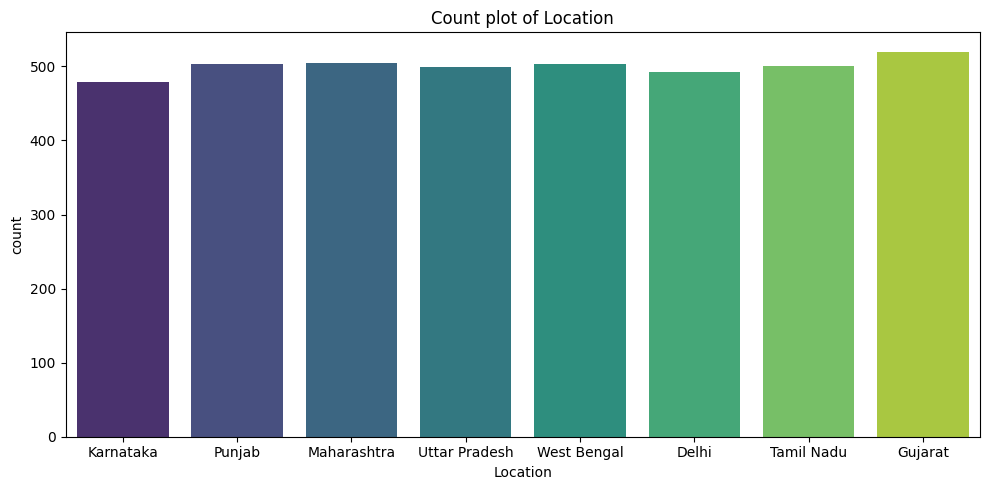

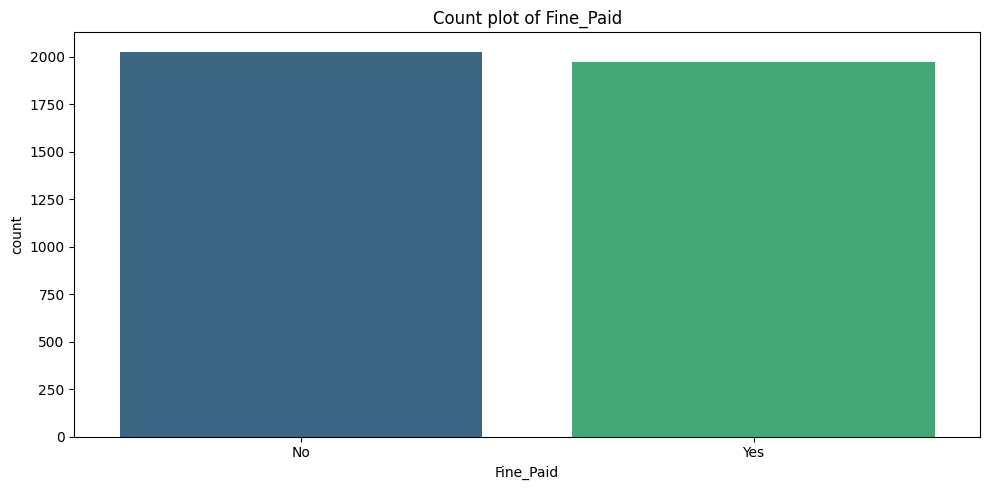

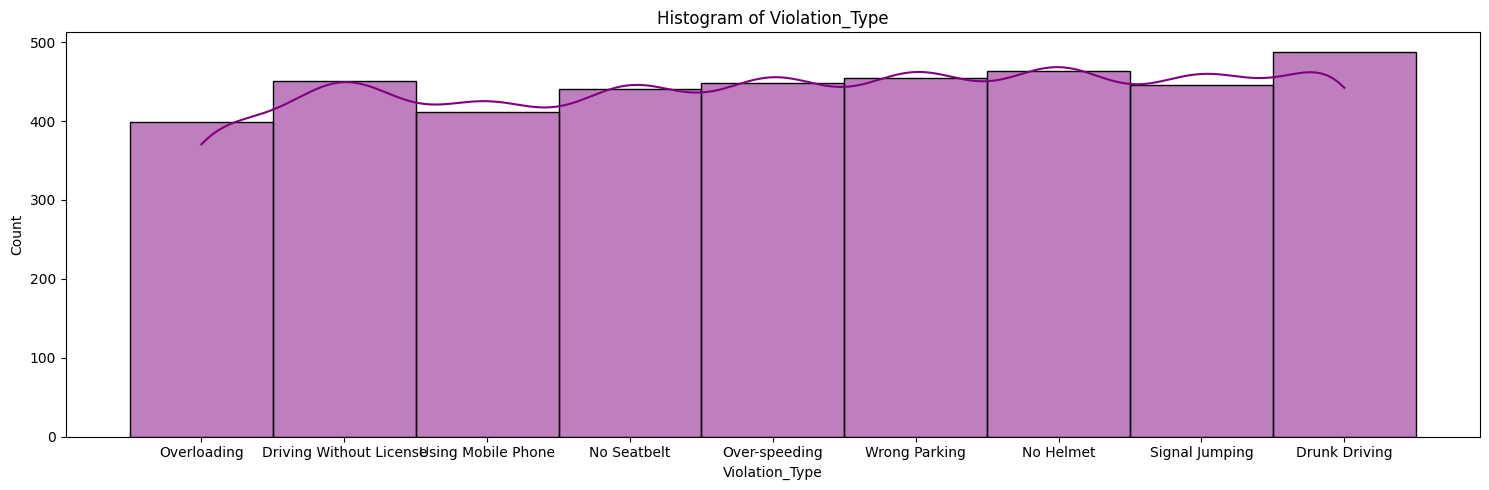

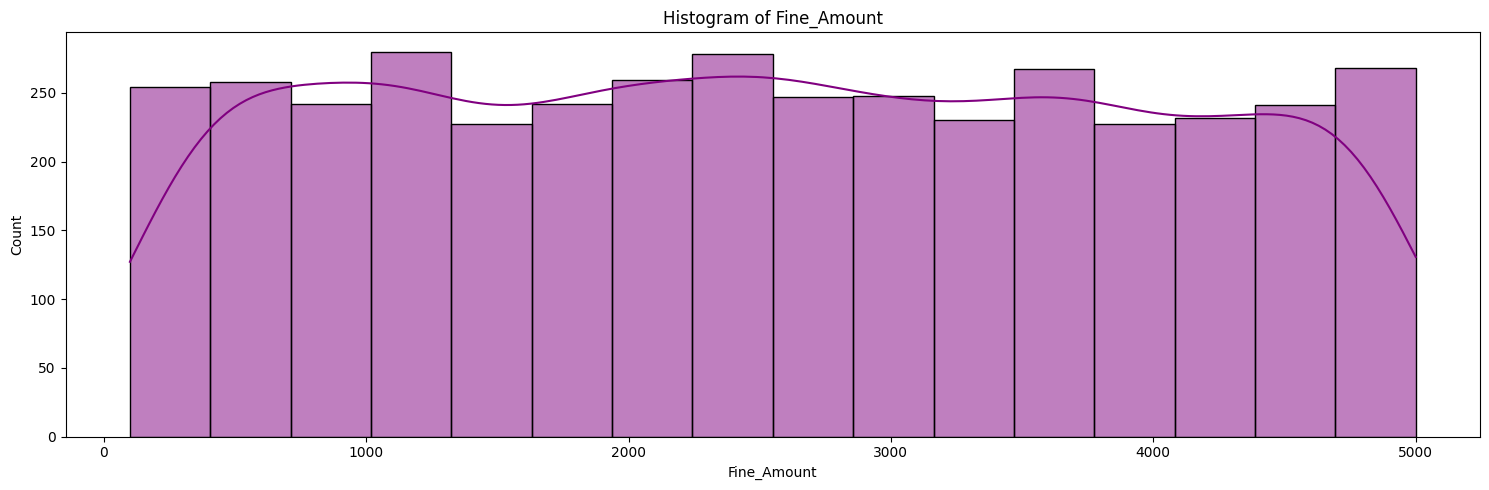

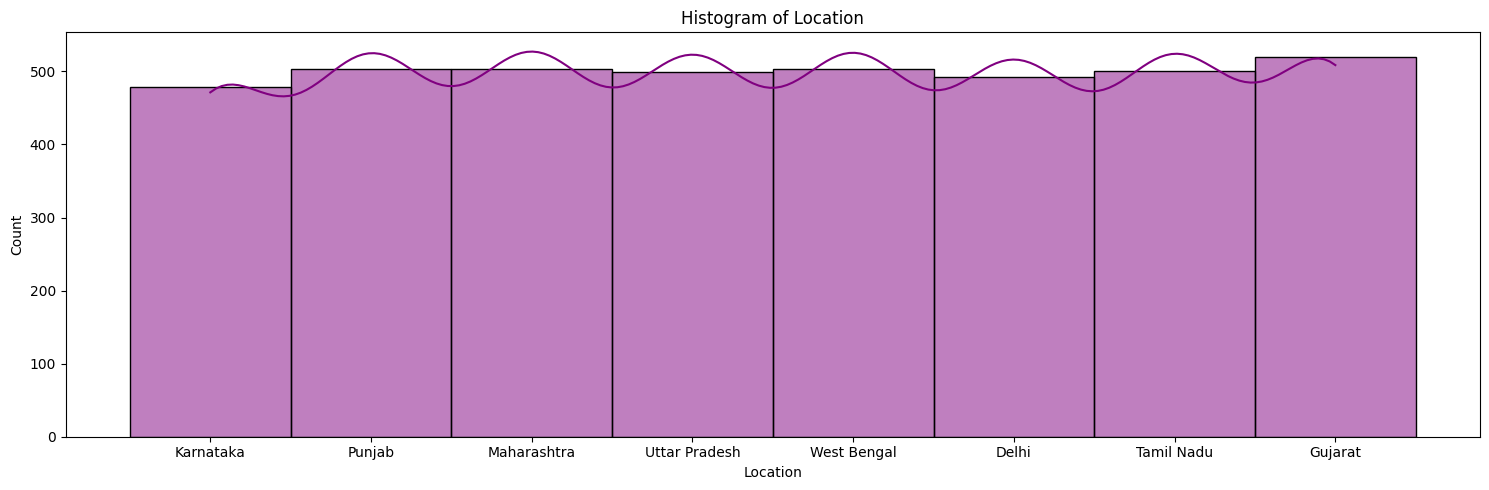

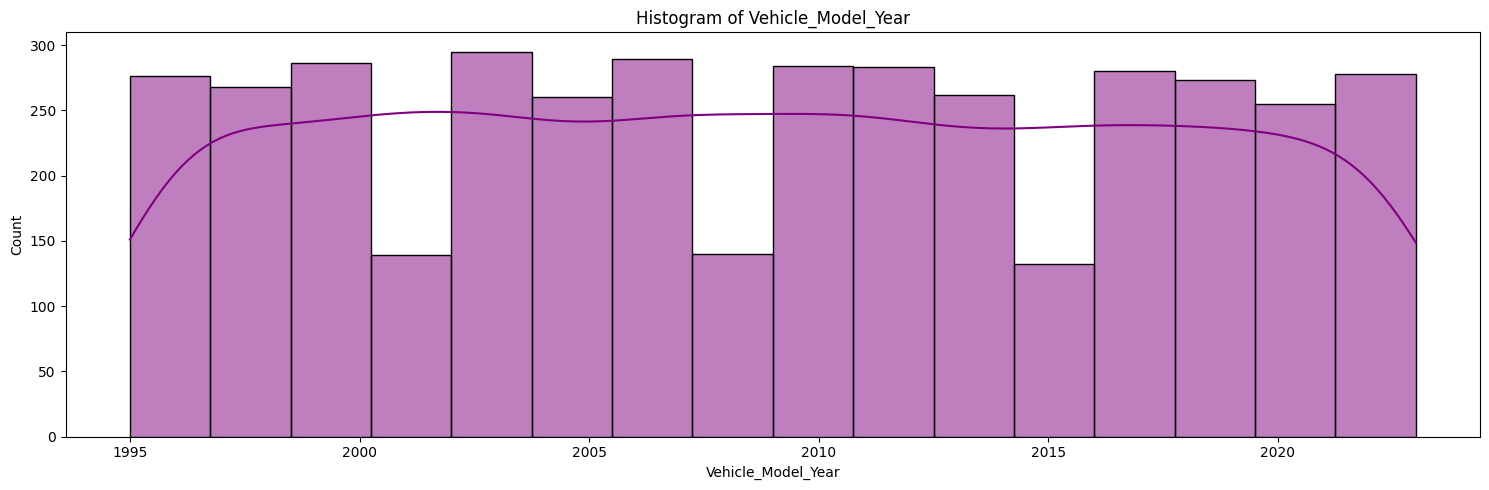

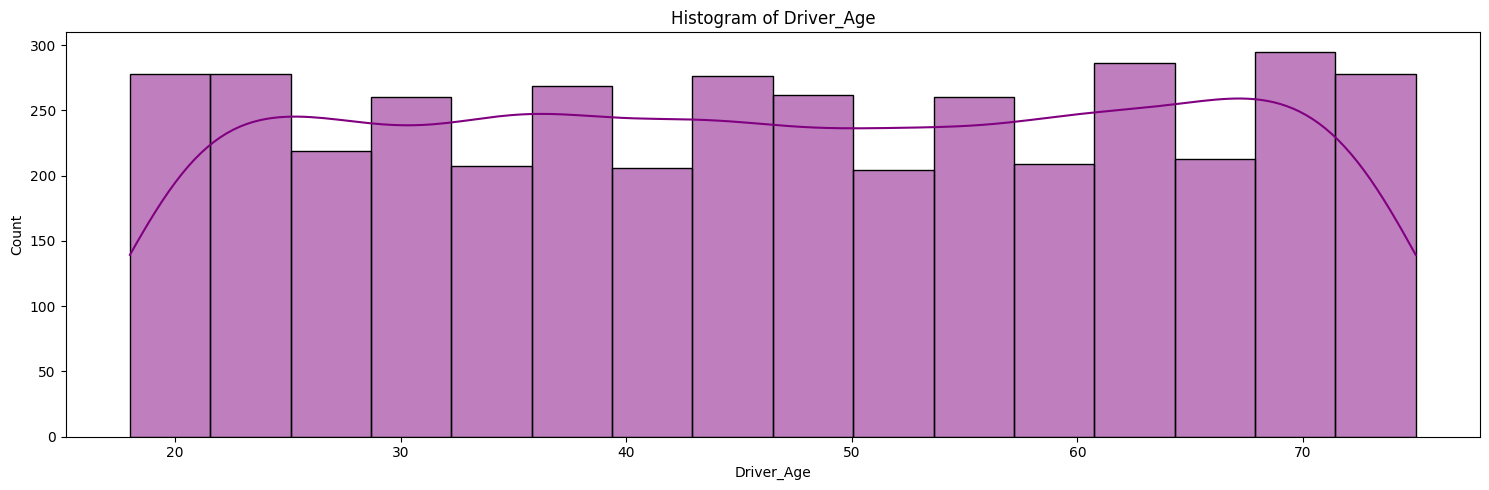

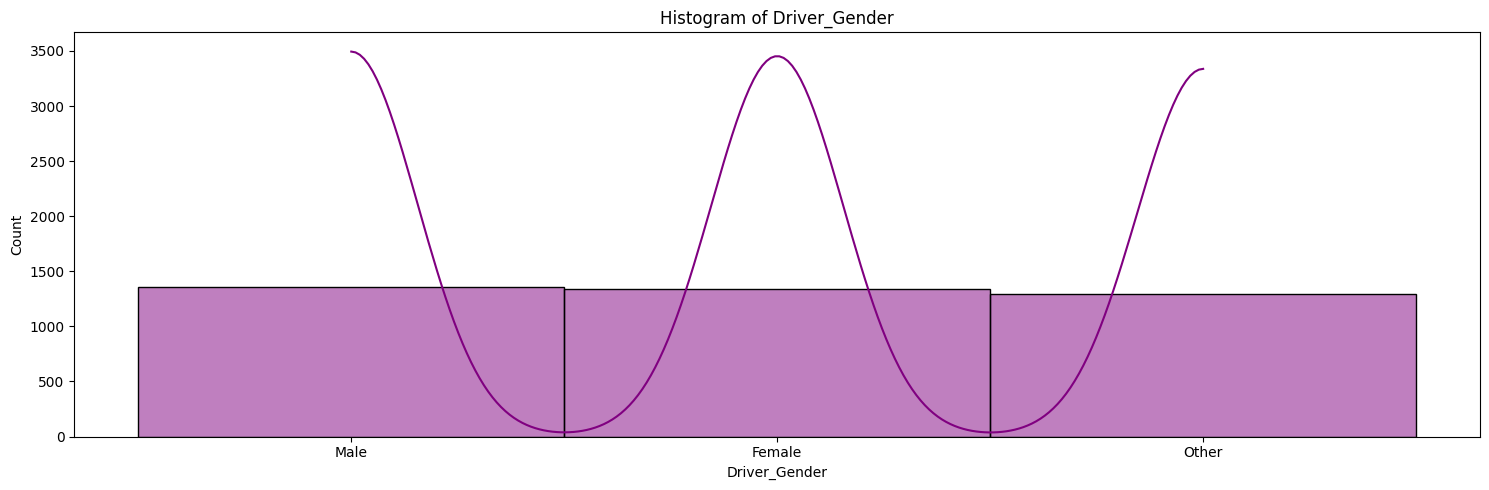

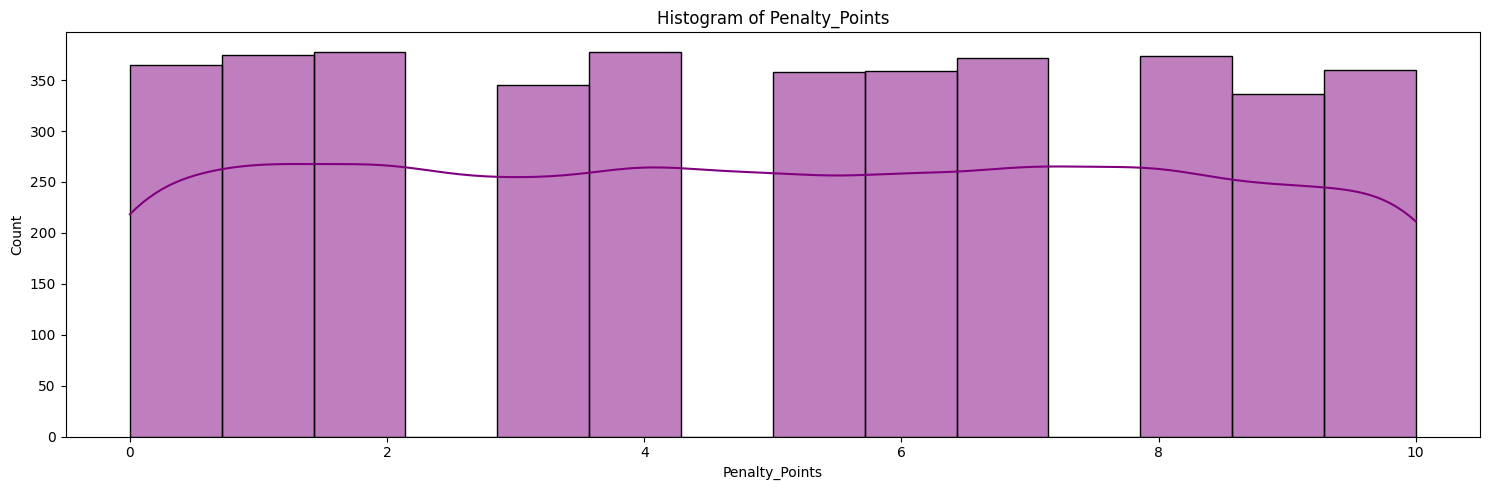

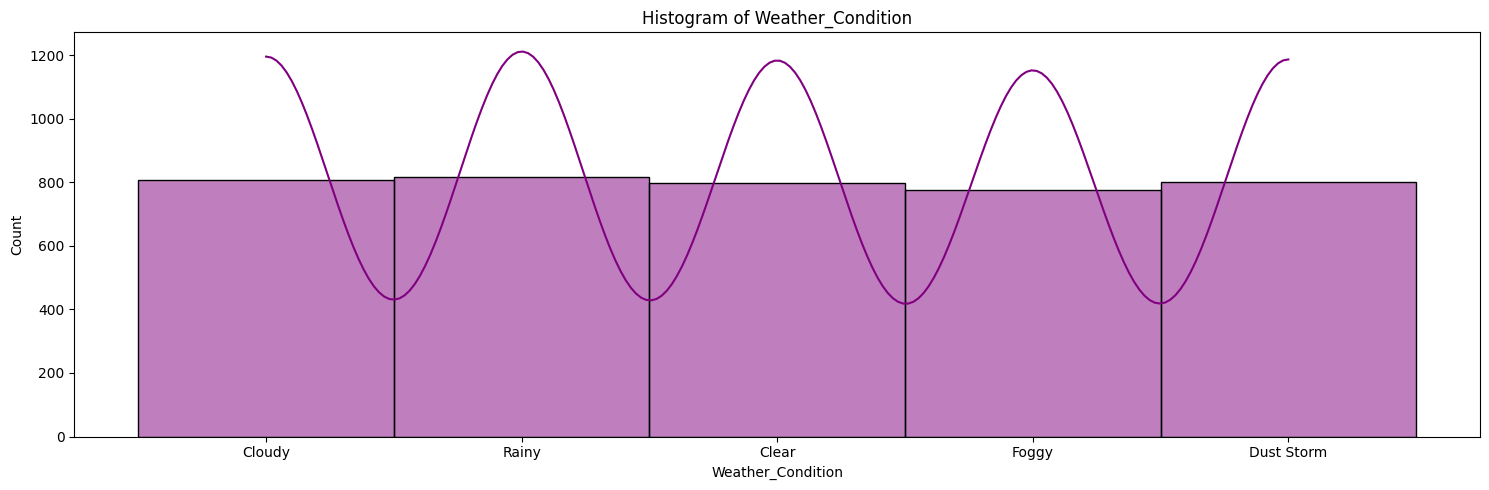

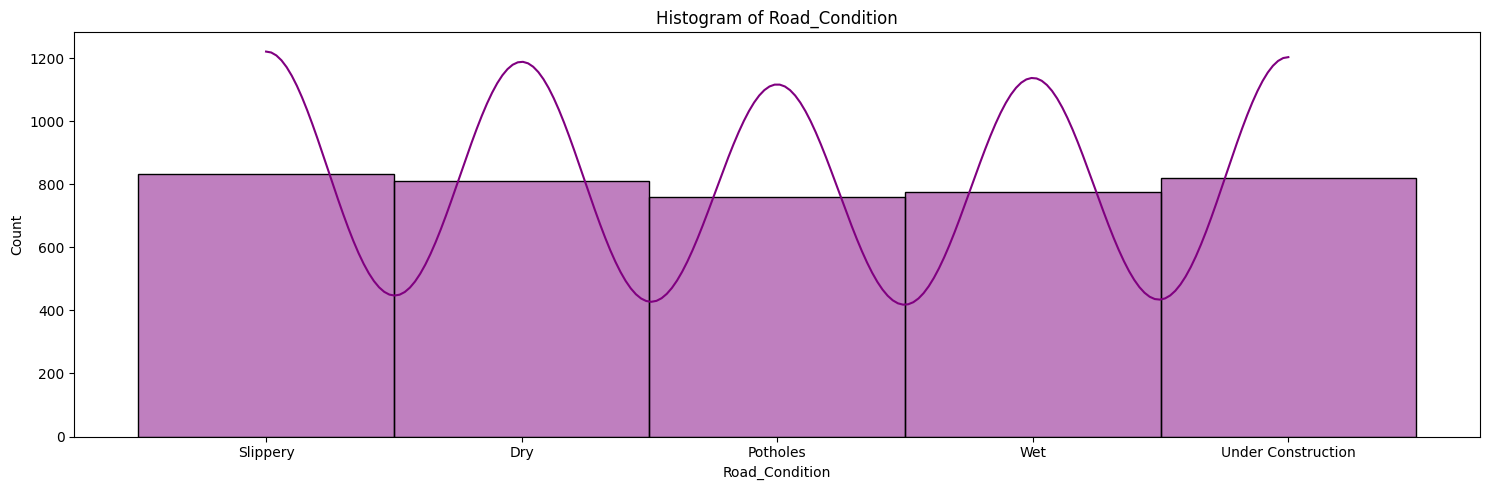

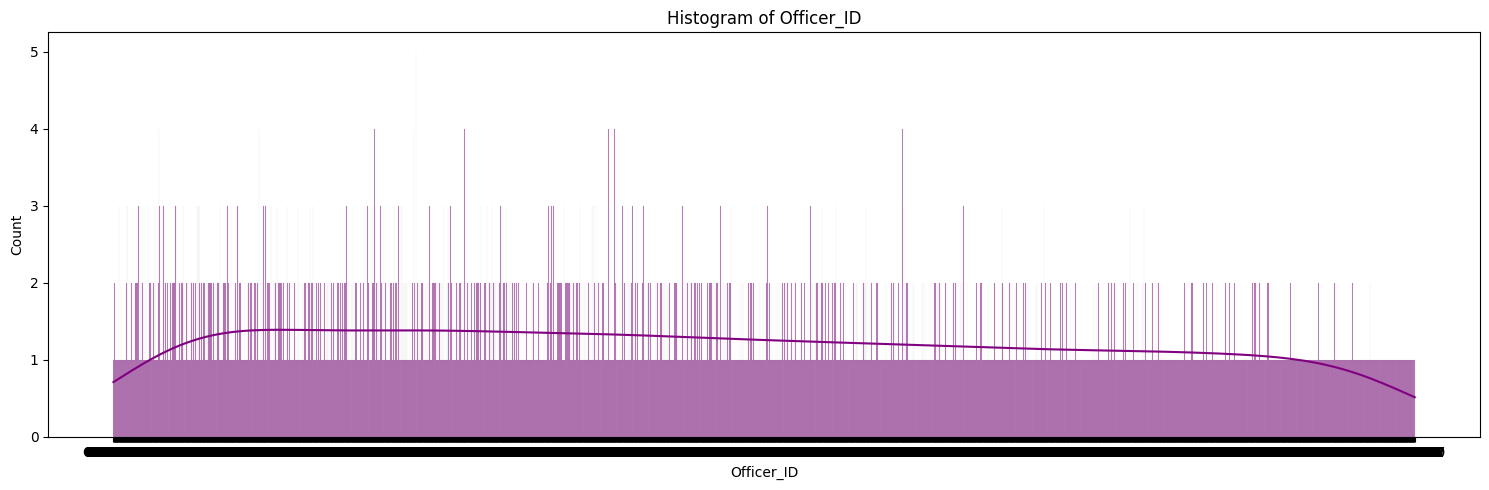

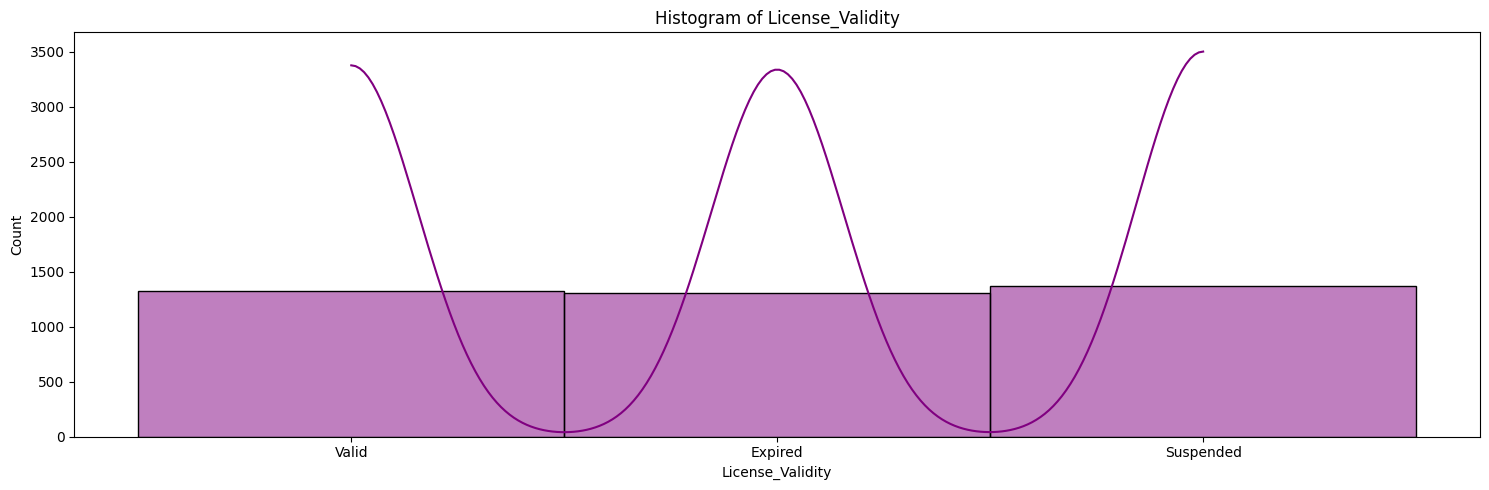

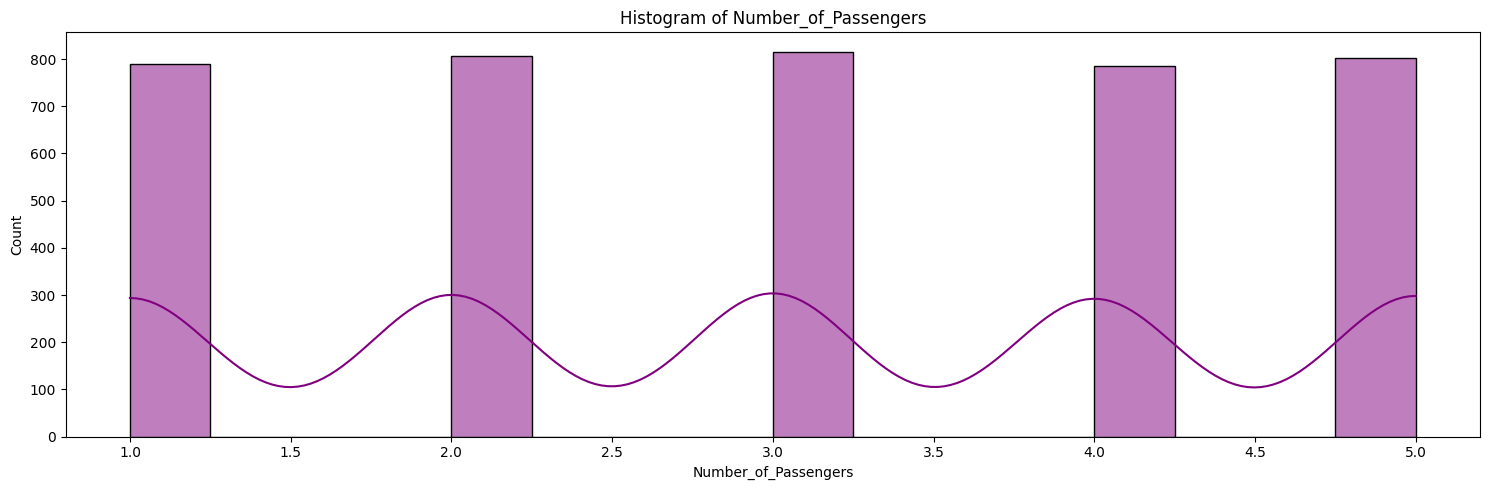

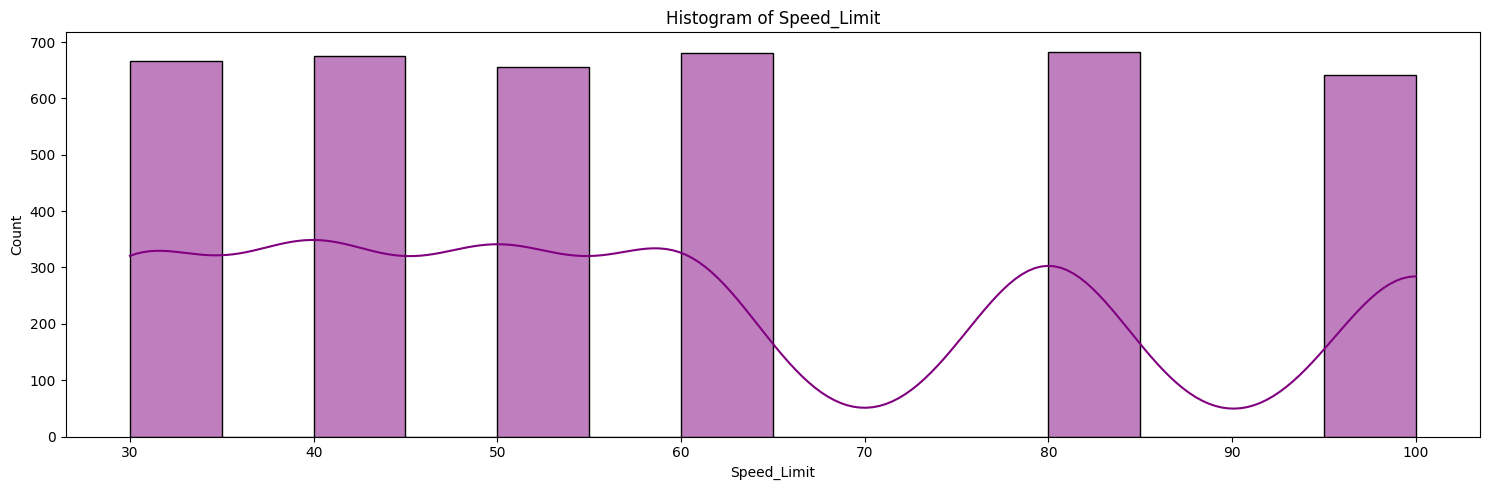

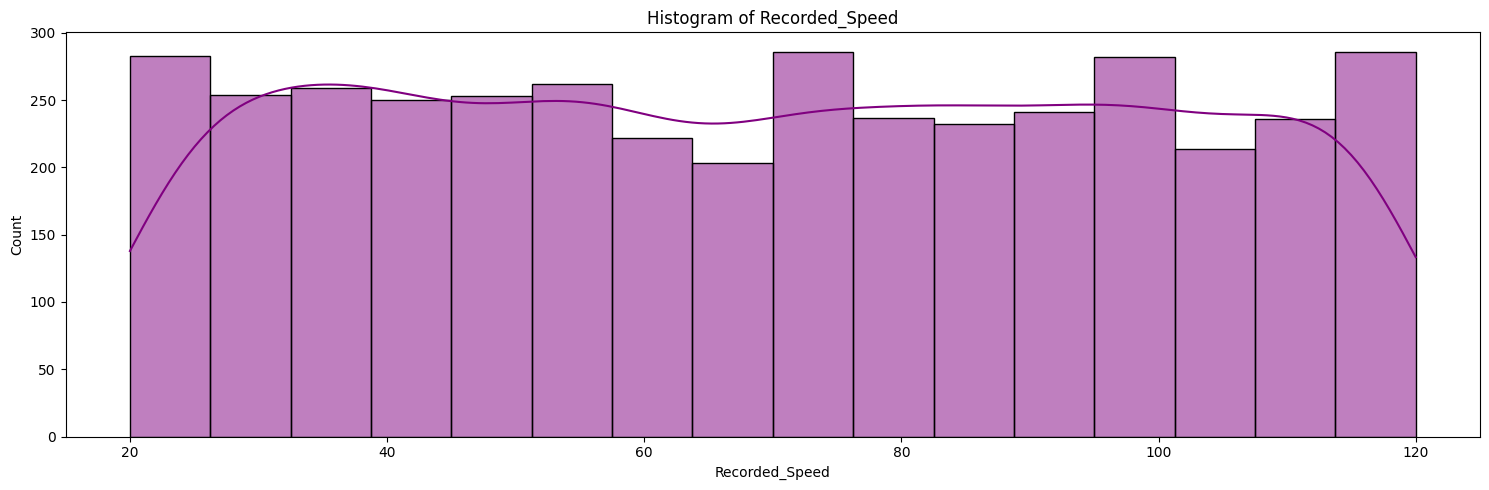

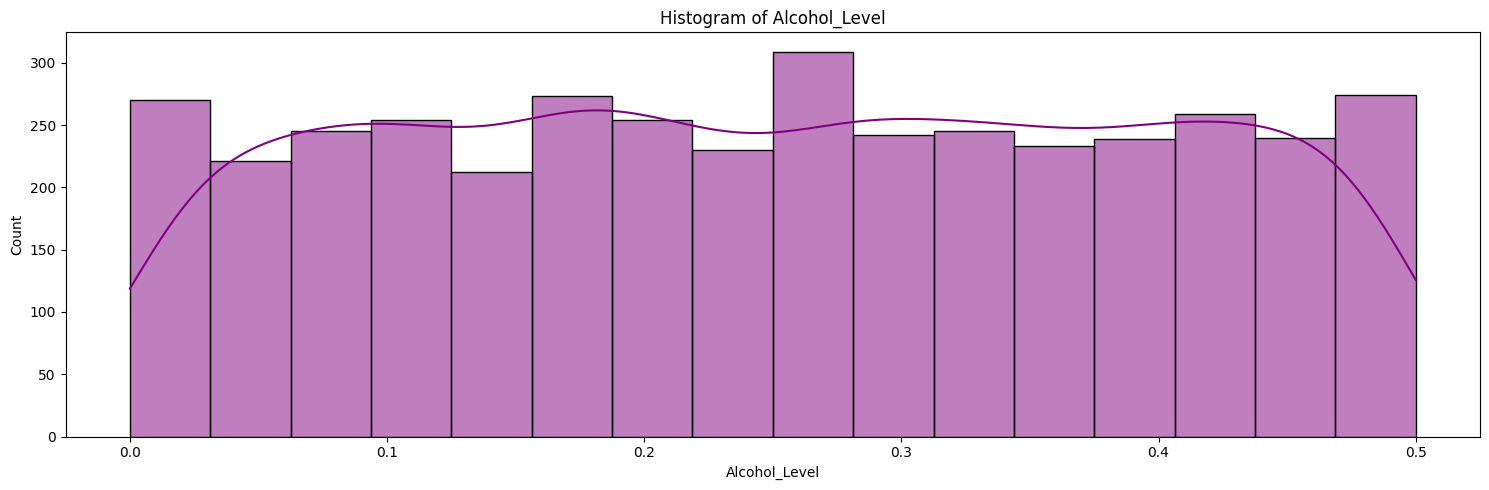

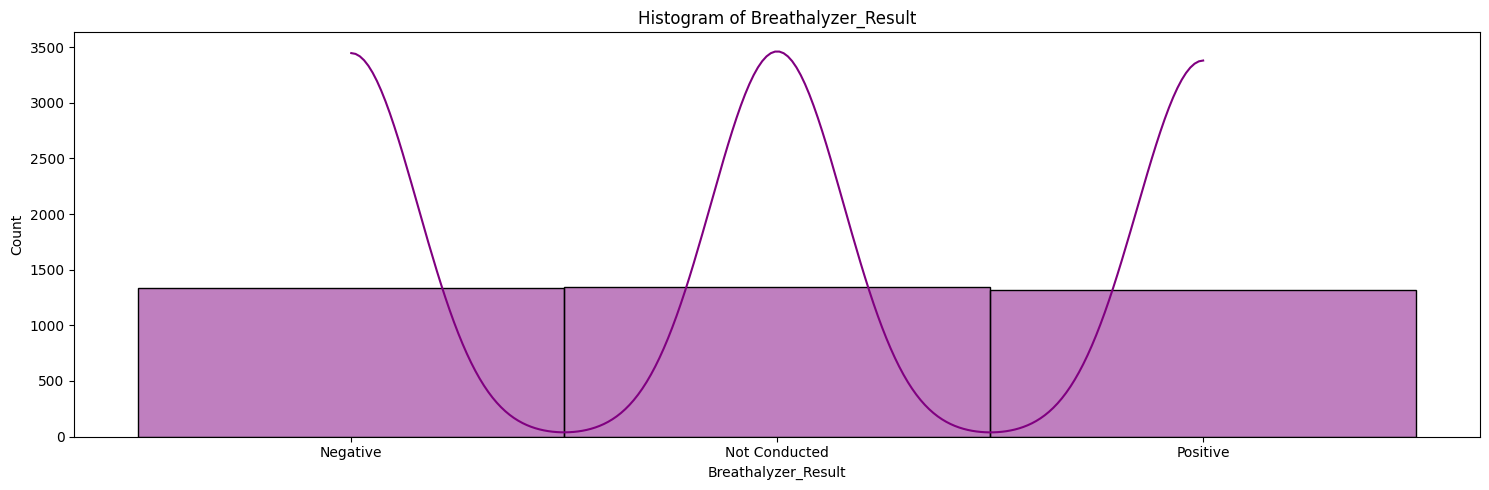

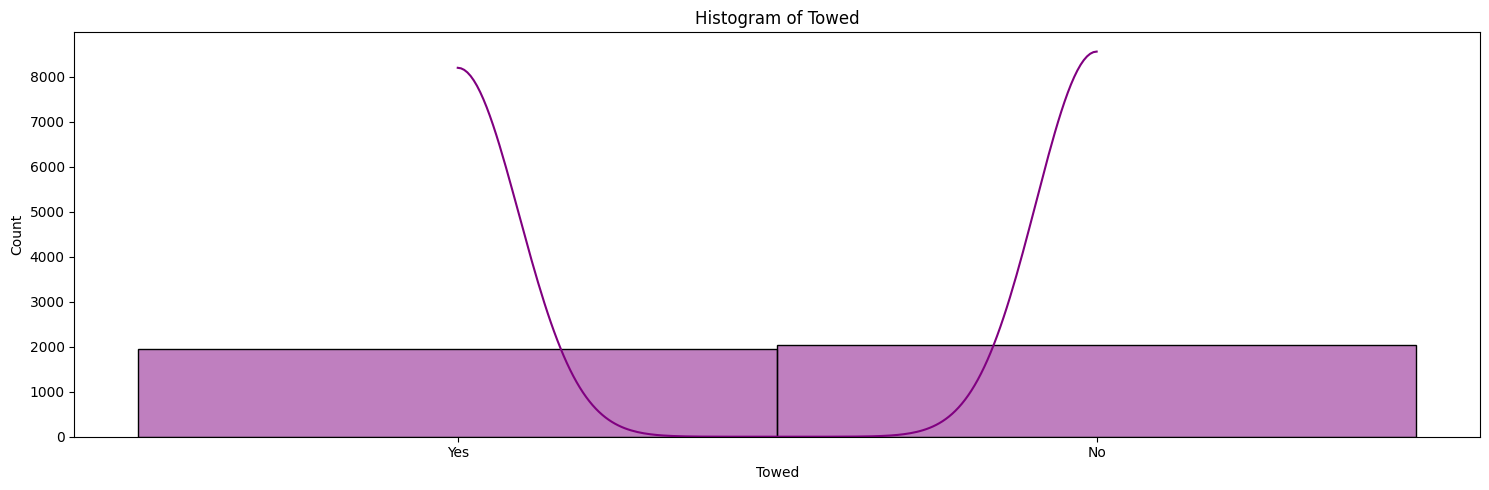

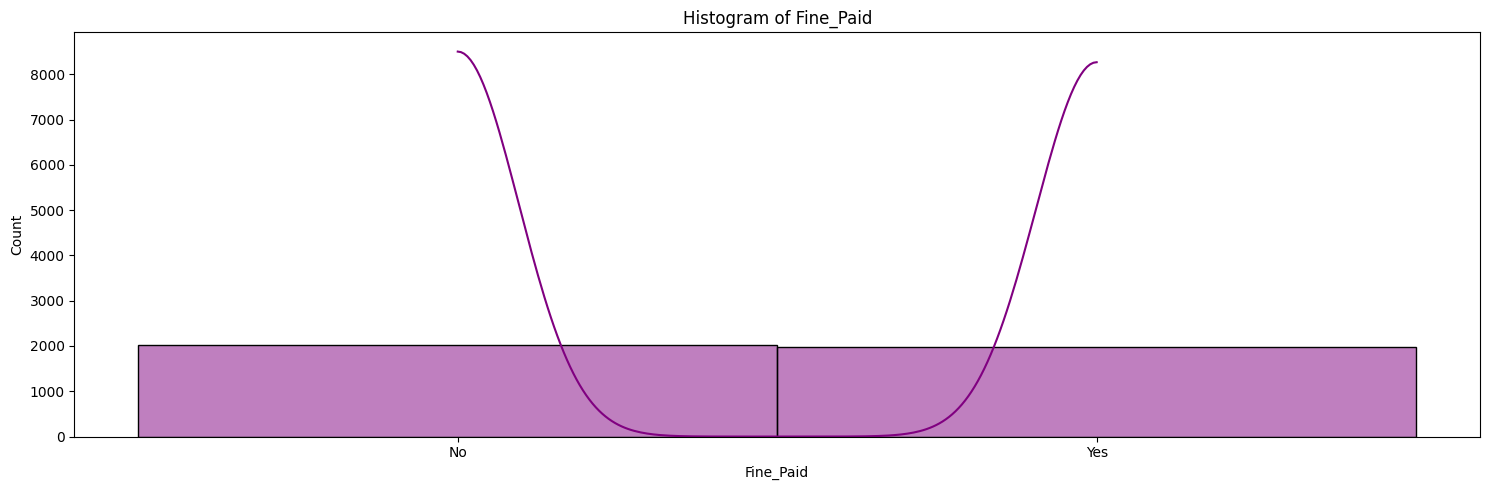

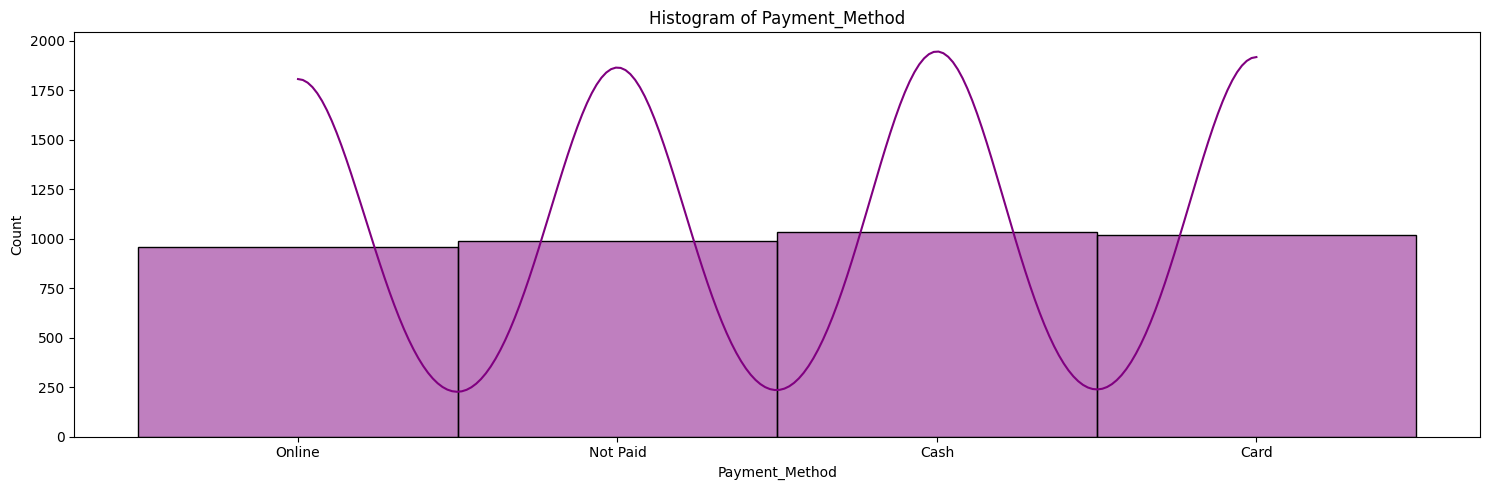

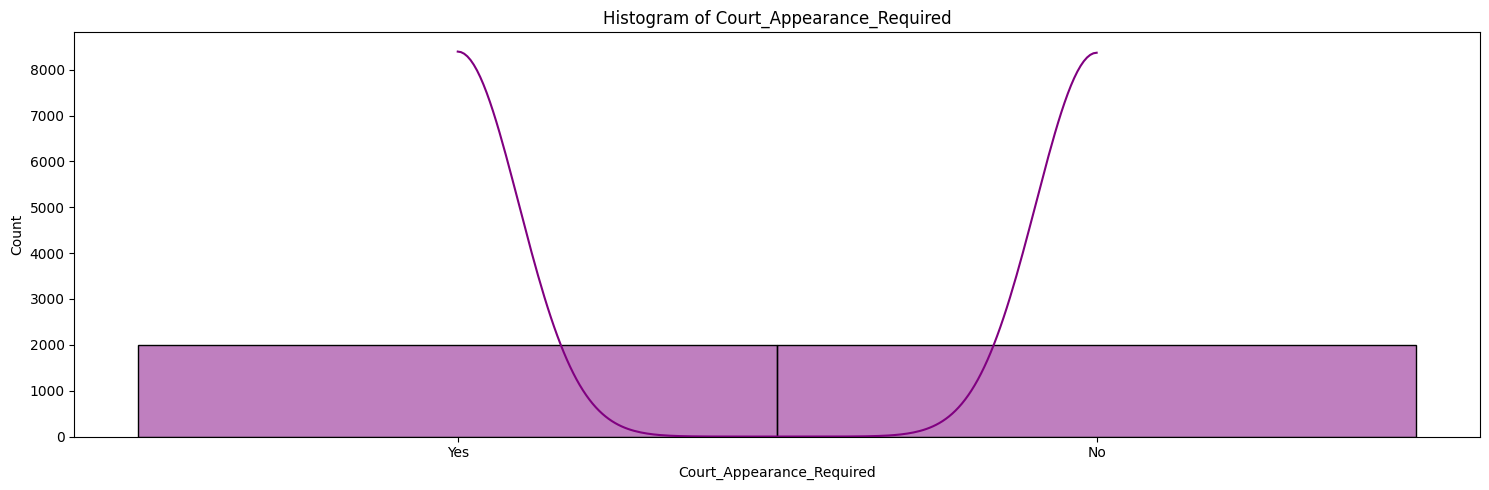

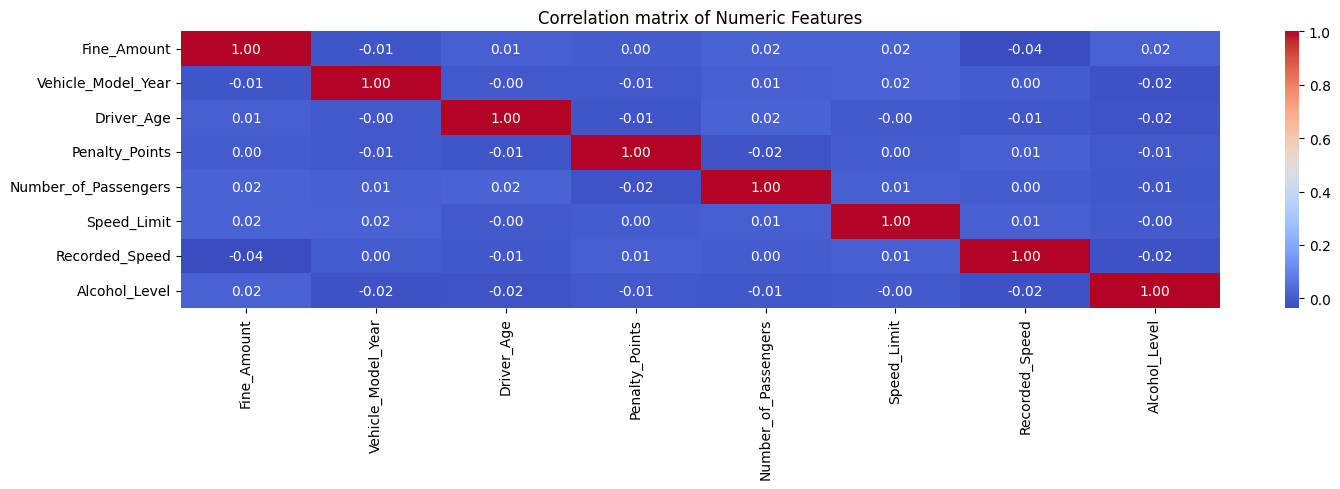

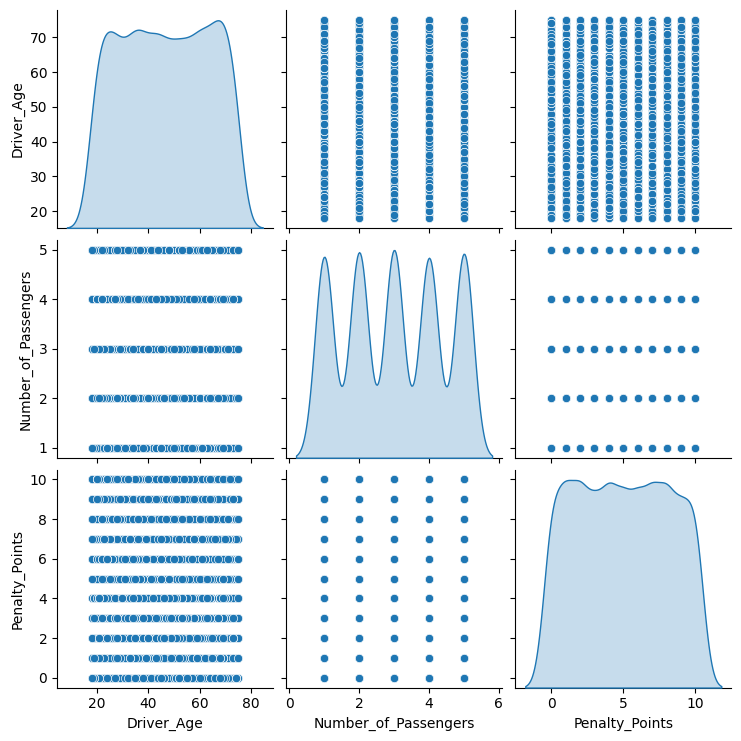

In [13]:
# COUNT PLOT FOR CATEGORICAL COLUMNS
cate_cols =['Location','Fine_Paid']
for features in cate_cols:
    if features in df.columns:
        plt.figure(figsize=(10,5))
        sns.countplot(x=features,data=df,palette='viridis')
        plt.title(f'Count plot of {features}')
        plt.tight_layout()
        plt.show()

#PLOT HISTOGRAM FOR SEVERAL KEY NUM_FEATURE.
num_feature = ['Violation_Type', 'Fine_Amount', 'Location', 'Vehicle_Model_Year',
       'Driver_Age', 'Driver_Gender', 'Penalty_Points',
       'Weather_Condition', 'Road_Condition', 'Officer_ID',
       'License_Validity', 'Number_of_Passengers', 'Speed_Limit',
       'Recorded_Speed', 'Alcohol_Level', 'Breathalyzer_Result', 'Towed',
       'Fine_Paid', 'Payment_Method', 'Court_Appearance_Required']

for feature in num_feature:
    if feature in df.columns:
        plt.figure(figsize=(15,5))
        sns.histplot(df[feature].dropna(),kde=True,color='purple')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

nume_df = df.select_dtypes(include=[np.number])
if nume_df.shape[1]>=4:
    plt.figure(figsize=(15,5))
    correlation_matrix = nume_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title('Correlation matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

# PAIR-PLOT AMONG A SUBSET OF VARIABLES
selected_columns = ['Driver_Age','Number_of_Passengers', 'Penalty_Points']
if set(selected_columns).issubset(df.columns):
    sns.pairplot(df[selected_columns].dropna(),diag_kind='kde')
    plt.show()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Violation_Type             4000 non-null   object 
 1   Fine_Amount                4000 non-null   int64  
 2   Location                   4000 non-null   object 
 3   Vehicle_Model_Year         4000 non-null   int64  
 4   Driver_Age                 4000 non-null   int64  
 5   Driver_Gender              4000 non-null   object 
 6   Penalty_Points             4000 non-null   int64  
 7   Weather_Condition          4000 non-null   object 
 8   Road_Condition             4000 non-null   object 
 9   Officer_ID                 4000 non-null   object 
 10  License_Validity           4000 non-null   object 
 11  Number_of_Passengers       4000 non-null   int64  
 12  Speed_Limit                4000 non-null   int64  
 13  Recorded_Speed             4000 non-null   int64

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
le_cols = ['Violation_Type', 'Location', 'Driver_Gender',
       'Weather_Condition', 'Road_Condition', 'Officer_ID',
       'License_Validity', 'Breathalyzer_Result', 'Towed',
       'Fine_Paid', 'Payment_Method', 'Court_Appearance_Required']

for column in le_cols:
    df[column] = le.fit_transform(df[column])



In [18]:
df.head()

,Violation_Type,Fine_Amount,Location,Vehicle_Model_Year,Driver_Age,Driver_Gender,Penalty_Points,Weather_Condition,Road_Condition,Officer_ID,License_Validity,Number_of_Passengers,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required
0,5,4544,2,2012,25,1,5,1,2,3204,2,4,100,95,0.03,0,1,0,3,1
1,0,2776,4,2010,32,0,4,4,0,1765,2,4,40,48,0.45,0,1,1,3,0
2,7,4785,3,2006,67,0,8,0,1,1655,2,5,80,26,0.31,1,0,0,2,1
3,3,1138,6,1996,46,1,3,4,4,1613,2,2,100,115,0.09,1,0,1,3,0
4,4,1610,2,2016,63,0,4,3,1,2167,2,4,30,115,0.28,2,0,1,1,1


In [19]:
df.columns.values

array(['Violation_Type', 'Fine_Amount', 'Location', 'Vehicle_Model_Year',
       'Driver_Age', 'Driver_Gender', 'Penalty_Points',
       'Weather_Condition', 'Road_Condition', 'Officer_ID',
       'License_Validity', 'Number_of_Passengers', 'Speed_Limit',
       'Recorded_Speed', 'Alcohol_Level', 'Breathalyzer_Result', 'Towed',
       'Fine_Paid', 'Payment_Method', 'Court_Appearance_Required'],
      dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Violation_Type             4000 non-null   int64  
 1   Fine_Amount                4000 non-null   int64  
 2   Location                   4000 non-null   int64  
 3   Vehicle_Model_Year         4000 non-null   int64  
 4   Driver_Age                 4000 non-null   int64  
 5   Driver_Gender              4000 non-null   int64  
 6   Penalty_Points             4000 non-null   int64  
 7   Weather_Condition          4000 non-null   int64  
 8   Road_Condition             4000 non-null   int64  
 9   Officer_ID                 4000 non-null   int64  
 10  License_Validity           4000 non-null   int64  
 11  Number_of_Passengers       4000 non-null   int64  
 12  Speed_Limit                4000 non-null   int64  
 13  Recorded_Speed             4000 non-null   int64

In [21]:
df['Alcohol_Level'] = df['Alcohol_Level'].map(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Violation_Type             4000 non-null   int64
 1   Fine_Amount                4000 non-null   int64
 2   Location                   4000 non-null   int64
 3   Vehicle_Model_Year         4000 non-null   int64
 4   Driver_Age                 4000 non-null   int64
 5   Driver_Gender              4000 non-null   int64
 6   Penalty_Points             4000 non-null   int64
 7   Weather_Condition          4000 non-null   int64
 8   Road_Condition             4000 non-null   int64
 9   Officer_ID                 4000 non-null   int64
 10  License_Validity           4000 non-null   int64
 11  Number_of_Passengers       4000 non-null   int64
 12  Speed_Limit                4000 non-null   int64
 13  Recorded_Speed             4000 non-null   int64
 14  Alcohol_Level           

In [23]:
df.head()

,Violation_Type,Fine_Amount,Location,Vehicle_Model_Year,Driver_Age,Driver_Gender,Penalty_Points,Weather_Condition,Road_Condition,Officer_ID,License_Validity,Number_of_Passengers,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required
0,5,4544,2,2012,25,1,5,1,2,3204,2,4,100,95,0,0,1,0,3,1
1,0,2776,4,2010,32,0,4,4,0,1765,2,4,40,48,0,0,1,1,3,0
2,7,4785,3,2006,67,0,8,0,1,1655,2,5,80,26,0,1,0,0,2,1
3,3,1138,6,1996,46,1,3,4,4,1613,2,2,100,115,0,1,0,1,3,0
4,4,1610,2,2016,63,0,4,3,1,2167,2,4,30,115,0,2,0,1,1,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [25]:
feat = ['Violation_Type', 'Fine_Amount', 'Location',
       'Driver_Age', 'Driver_Gender', 'Penalty_Points',
       'Weather_Condition', 'Road_Condition',
       'Number_of_Passengers',
       'Recorded_Speed', 'Alcohol_Level',
       'Fine_Paid', 'Payment_Method',]

X = df[feat].dropna()
y = df.loc[X.index,'Breathalyzer_Result']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size=0.2)

In [27]:
rf = RandomForestRegressor(n_estimators=100)

In [28]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
y_pred = rf.predict(X_test)

In [30]:
rmse = mean_squared_error(y_pred,y_test)
r2_score = r2_score(y_pred,y_test)

In [31]:
print(f'rmse:',rmse)
print(f'r2-score:',r2_score)

rmse: 0.659535875
r2-score: -26.69347590437476


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred_lr = lr.predict(X_test)

In [36]:
acc_lr = accuracy_score(y_pred_lr,y_test)
print(f'acc:',acc_lr)

acc: 0.32625


In [37]:
from sklearn.svm import SVC

In [38]:
scc = SVC()

In [39]:
scc.fit(X_train,y_train)

SVC()

In [40]:
y_pred_scc = scc.predict(X_test)

In [41]:
acc_scc = accuracy_score(y_pred_scc,y_test)
print(f'acc_scc:',acc_scc)

acc_scc: 0.315


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gb = GradientBoostingClassifier()

In [44]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [45]:
y_pred_gb = gb.predict(X_test)

In [46]:
acc_gb = accuracy_score(y_pred_gb,y_test)
print(f'acc_gb:',acc_gb)

acc_gb: 0.35


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred_rfc = rfc.predict(X_test)

In [51]:
acc_rfc = accuracy_score(y_pred_rfc,y_test)
print(f'acc_rfc:',acc_rfc)

acc_rfc: 0.35375


In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
kn = KNeighborsClassifier()

In [54]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred_kn = kn.predict(X_test)

In [56]:
acc_kn = accuracy_score(y_pred_kn,y_test)
print(f'acc_kn:',acc_kn)

acc_kn: 0.32375


In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtc = DecisionTreeClassifier()

In [59]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred_dtc = dtc.predict(X_test)

In [61]:
acc_dtc = accuracy_score(y_pred_dtc,y_test)
print(f'acc_dtc:',acc_dtc)

acc_dtc: 0.3325


# NEED THE FINE-TUENING FOR BETTER RESULT.